## Obtencion Info Alojamientos

In [40]:
import pandas as pd

# Path
import sys
sys.path.append('../')

from src import support_alojamiento as sup_aloja
import matplotlib.pyplot as plt


In [12]:
# soup = sup_aloja.scrap_url(-1456928, '2025-02-13', '2025-02-16')
# df = sup_aloja.soup_to_df(soup)
# df.head()

In [13]:
#df.shape

In [14]:
#df.to_csv('../datos/df_alojamientos_2025_02_13-16.csv')

In [15]:
df = pd.read_csv('../datos/df_alojamientos_2025_02_13-16.csv', index_col=0)

### Relación entre Precio y Distancia al centro (Gráfico de dispersión)

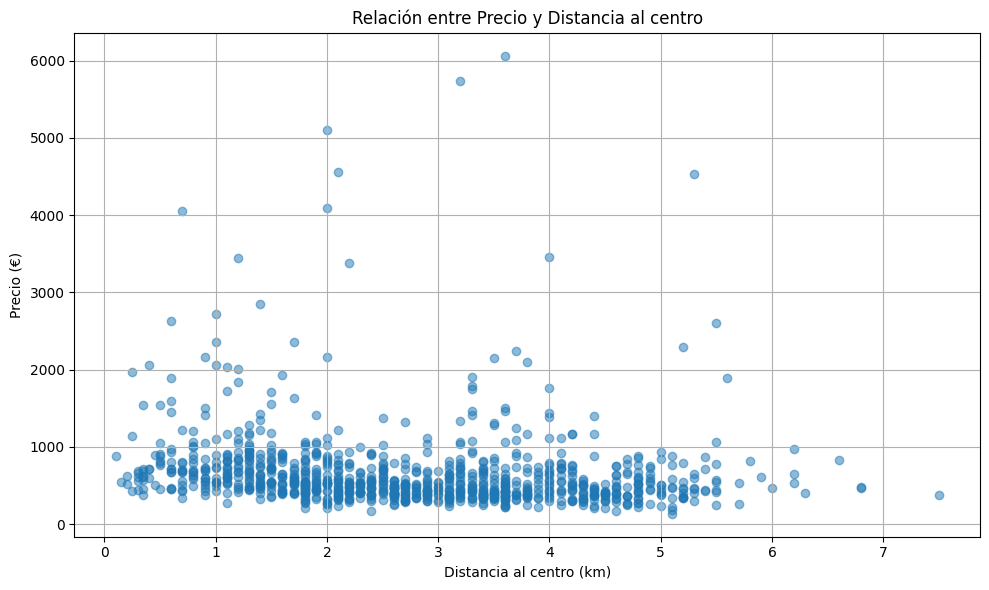

In [41]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Distance to center'], df['Price (€)'], alpha=0.5)

plt.title('Relación entre Precio y Distancia al centro')
plt.xlabel('Distancia al centro (km)')
plt.ylabel('Precio (€)')
plt.grid(True)
plt.tight_layout()
plt.show()

### Distribución de Precios (Histograma)

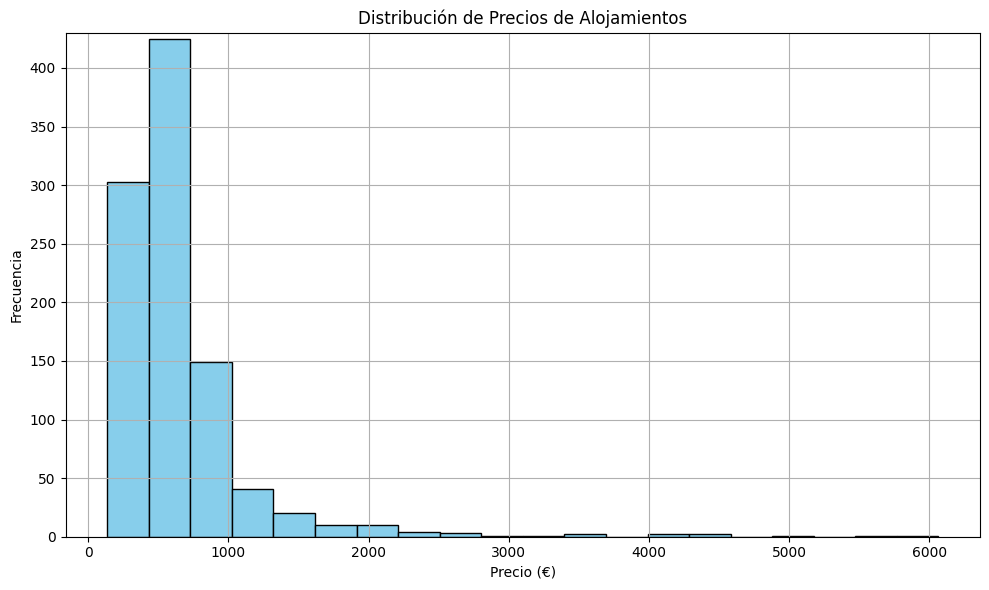

In [48]:
plt.figure(figsize=(10, 6))
plt.hist(df['Price (€)'], bins=20, color='skyblue', edgecolor='black')

plt.title('Distribución de Precios de Alojamientos')
plt.xlabel('Precio (€)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.ylim(0,430)
plt.tight_layout()
plt.show()


### Comparación entre Precio y Puntuación del alojamiento

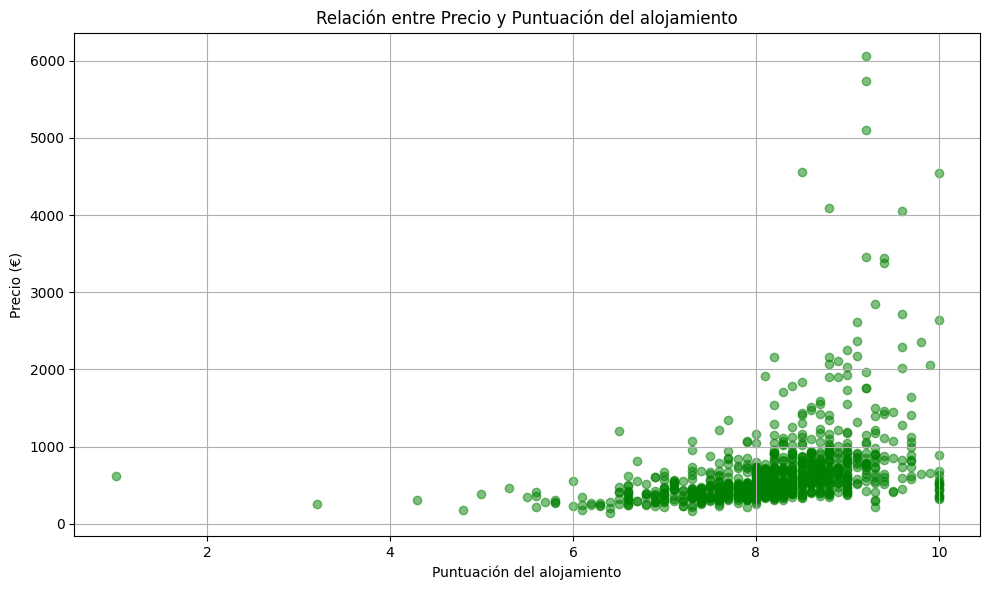

In [49]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Score'], df['Price (€)'], alpha=0.5, color='green')

plt.title('Relación entre Precio y Puntuación del alojamiento')
plt.xlabel('Puntuación del alojamiento')
plt.ylabel('Precio (€)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [16]:
df_ordenado_precios = df.sort_values(by='Price (€)', ascending=False)

In [17]:
mas_caros = df_ordenado_precios.head(20)
mas_caros['tipo'] = 'caro'

C:\Users\JLFA\AppData\Local\Temp\ipykernel_4052\3030643299.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mas_caros['tipo'] = 'caro'


In [18]:
mas_baratos = df_ordenado_precios.tail(20)
mas_baratos['tipo'] = 'barato'

C:\Users\JLFA\AppData\Local\Temp\ipykernel_4052\2946114628.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mas_baratos['tipo'] = 'barato'


In [19]:
df_extract = pd.concat([mas_caros,mas_baratos])

### curiosamente, podemos ver que los alojamientos 'caros', tienen casi todas las 'location score' y sin embargo, los 'baratos' nop.

In [21]:
df_extract.groupby('tipo').count().reset_index()

,tipo,Name,Address,Distance to center,Score,Location score,Price (€),Link
0,barato,20,20,20,20,0,20,20
1,caro,20,20,20,20,18,20,20


In [22]:
df_cercania_centro = df_extract.sort_values(by='Distance to center', ascending=True)

In [28]:
mas_centricos = df_cercania_centro.head(20).reset_index()
menos_centricos = df_cercania_centro.tail(20).reset_index()

In [29]:
mas_centricos.groupby('tipo').count().reset_index()

,tipo,index,Name,Address,Distance to center,Score,Location score,Price (€),Link
0,barato,6,6,6,6,6,0,6,6
1,caro,14,14,14,14,14,14,14,14


In [30]:
mas_centricos[mas_centricos['tipo'] == 'barato']

,index,Name,Address,Distance to center,Score,Location score,Price (€),Link,tipo
8,2,Hotel Luna Park,"Bastilla - 11º distrito, París",1.8,7.9,NaN,215.0,https://www.booking.com/hotel/fr/luna-park.es....,barato
12,482,Au Royal Mad,"Bastilla - 11º distrito, París",2.0,6.4,NaN,209.0,https://www.booking.com/hotel/fr/au-royal-mad....,barato
14,537,Auberge Internationale des Jeunes,"Bastilla - 11º distrito, París",2.1,6.3,NaN,232.0,https://www.booking.com/hotel/fr/auberge-inter...,barato
16,66,Hotel Europe BLV,"Bastilla - 11º distrito, París",2.4,4.8,NaN,173.0,https://www.booking.com/hotel/fr/de-l-39-europ...,barato
17,164,A la Pinte du Nord,"République - 10º distrito, París",2.6,6.6,NaN,244.0,https://www.booking.com/hotel/fr/a-la-pinte-du...,barato
18,292,Hôtel Résidence De Bruxelles,"Montmartre - 18º distrito, París",3.1,6.2,NaN,240.0,https://www.booking.com/hotel/fr/residence-de-...,barato


### El hotel 'Hotel Luna Park' tiene bastante buena pinta, ya que esta mas o menos centrico y la diferencia de precio es abismal.

### 215€ 4 dias

In [50]:
mas_centricos.head(10)

,index,Name,Address,Distance to center,Score,Location score,Price (€),Link,tipo
0,766,Prestige l Pont Neuf l Louvre l 3CH l 2SDB l CLIM,"Louvre - 1er distrito, París",0.6,10.0,10.0,2634.0,https://www.booking.com/hotel/fr/prestige-l-po...,caro
1,138,Le Notre Dame - Luxury Apartment with Seine View,"Saint-Germain - 6º distrito, París",0.7,9.6,9.9,4050.0,https://www.booking.com/hotel/fr/apartment-gra...,caro
2,450,Relais Christine,"Saint-Germain - 6º distrito, París",0.9,9.1,9.7,2169.0,https://www.booking.com/hotel/fr/relais-christ...,caro
3,136,Le Clos Des Vosges,"Hôtel-de-Ville - 4º distrito, París",1.0,9.6,10.0,2720.0,https://www.booking.com/hotel/fr/spacious-apar...,caro
4,30,"Amazing Premium flat, fantastic location, 1290...","Le Marais - 3er distrito, París",1.0,9.8,9.7,2357.0,https://www.booking.com/hotel/fr/amazing-premi...,caro
5,944,"Maison Proust, Hotel & Spa La Mer","Le Marais - 3er distrito, París",1.2,9.4,9.3,3443.0,https://www.booking.com/hotel/fr/maison-proust...,caro
6,60,Chic Parisian Flat,"Le Marais - 3er distrito, París",1.4,9.3,9.5,2848.0,https://www.booking.com/hotel/fr/luxury-parisi...,caro
7,133,Bourse Feydeau,"Bourse - 2º distrito, París",1.7,9.1,9.4,2364.0,https://www.booking.com/hotel/fr/bourse-feydea...,caro
8,2,Hotel Luna Park,"Bastilla - 11º distrito, París",1.8,7.9,NaN,215.0,https://www.booking.com/hotel/fr/luna-park.es....,barato
9,810,Park Hyatt Paris - Vendôme,"Bourse - 2º distrito, París",2.0,8.8,9.8,4090.0,https://www.booking.com/hotel/fr/park-hyatt-pa...,caro


### Por si los clientes no se fian, este alojamiento es el mas centrico, sin embargo

In [37]:
mas_centricos[mas_centricos['index'] == 766]

,index,Name,Address,Distance to center,Score,Location score,Price (€),Link,tipo
0,766,Prestige l Pont Neuf l Louvre l 3CH l 2SDB l CLIM,"Louvre - 1er distrito, París",0.6,10.0,10.0,2634.0,https://www.booking.com/hotel/fr/prestige-l-po...,caro


### tenemos este otro con una diferencia de 450€ y solo esta 300m mas lejos ademas que su puntuacion y del lugar y de la ubicacion es bastante buena

In [38]:
mas_centricos[mas_centricos['index'] == 450]

,index,Name,Address,Distance to center,Score,Location score,Price (€),Link,tipo
2,450,Relais Christine,"Saint-Germain - 6º distrito, París",0.9,9.1,9.7,2169.0,https://www.booking.com/hotel/fr/relais-christ...,caro
